In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Añadimos los dataframes
df_cr = pd.read_csv("extract - cash request - data analyst.csv", parse_dates=['created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 'cash_request_received_date', 'money_back_date', 'send_at', 'reco_creation', 'reco_last_update'])
df_fee = pd.read_csv("extract - fees - data analyst - .csv", parse_dates=['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date'])

In [3]:
# % de nulos por columna
df_cr.dtypes
df_cr.isna().sum() #User id, cambiarlo por deleted_account_id en aquellos que esté vacío
(df_cr.isnull().sum()/(len(df_cr)))*100

id                             0.000000
amount                         0.000000
status                         0.000000
created_at                     0.000000
updated_at                     0.000000
user_id                        8.773467
moderated_at                  33.103880
deleted_account_id            91.222361
reimbursement_date             0.000000
cash_request_received_date    32.044222
money_back_date               30.984564
transfer_type                  0.000000
send_at                       30.575720
recovery_status               86.107635
reco_creation                 86.107635
reco_last_update              86.107635
dtype: float64

In [4]:
# % de nulos por columna
df_fee.dtypes
df_fee.isna().sum() #paid_at as null if it0's cancelled. #category is null if it's not an incident
(df_fee.isnull().sum()/(len(df_fee)))*100

id                  0.000000
cash_request_id     0.018992
type                0.000000
status              0.000000
category           89.573145
total_amount        0.000000
reason              0.000000
created_at          0.000000
updated_at          0.000000
paid_at            26.257063
from_date          63.126157
to_date            63.126157
charge_moment       0.000000
dtype: float64

## Exploración Dataframe

In [5]:
mean_amount_cr = df_cr['amount'].mean()
median_amount_cr = df_cr['amount'].median()
print(f"La media de la cantidad solicitada es {mean_amount_cr:.2f} y la mediana es {median_amount_cr:.2f}")

La media de la cantidad solicitada es 82.72 y la mediana es 100.00


In [6]:
df_cr.describe().T #Amount is negatively skewed

,count,mean,min,25%,50%,75%,max,std
id,23970.0,13910.966124,3.0,7427.25,14270.5,20607.75,27010.0,7788.117214
amount,23970.0,82.720818,1.0,50.0,100.0,100.0,200.0,26.528065
user_id,21867.0,32581.250789,34.0,10804.0,23773.0,46965.0,103719.0,27618.565773
deleted_account_id,2104.0,9658.755228,91.0,3767.0,6121.5,16345.0,30445.0,7972.743249
cash_request_received_date,16289,2020-08-26 09:17:07.024372224,2019-12-10 00:00:00,2020-07-17 00:00:00,2020-09-15 00:00:00,2020-10-20 00:00:00,2020-11-27 00:00:00,NaN


In [7]:
df_fee.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21061.0,10645.355111,6099.315256,1.0,5385.0,10652.0,15925.0,21193.0
cash_request_id,21057.0,16318.449162,6656.149949,1456.0,11745.0,17160.0,21796.0,27010.0
total_amount,21061.0,5.000237,0.034453,5.0,5.0,5.0,5.0,10.0


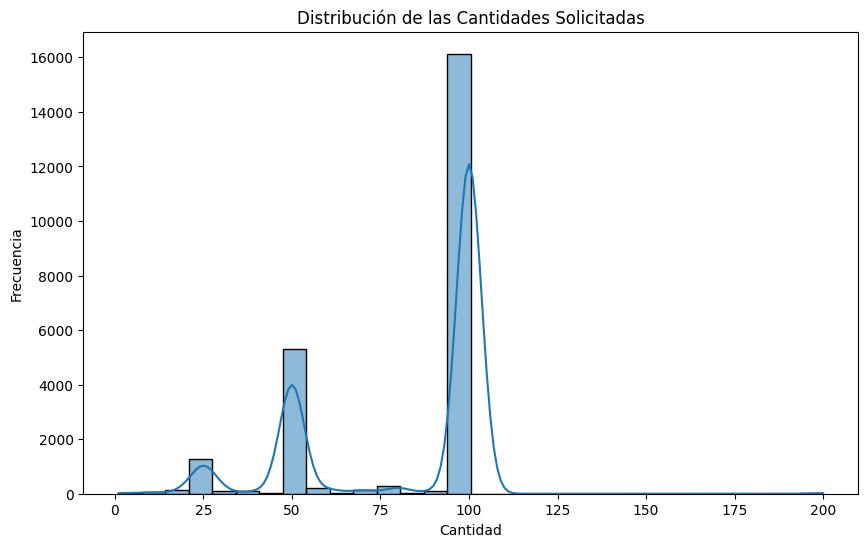

In [8]:
# Distribución de las cantidades solicitadas: vemos claramente 3 agrupaciones.
plt.figure(figsize=(10, 6))
sns.histplot(df_cr['amount'], bins=30, kde=True)
plt.title('Distribución de las Cantidades Solicitadas')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()
# Agrupar en 3 tipos

In [9]:
# Definir los límites de los grupos
def categorize_amount(amount):
    if amount <= 30:
        return 'Grupo 1'
    elif 30 < amount <= 55:
        return 'Grupo 2'
    elif 55 < amount:
        return 'Grupo 3'
    else:
        return 'Otros'

# Aplicar la función al dataframe
df_cr['Grupo'] = df_cr['amount'].apply(categorize_amount)

# Mostrar las primeras filas del dataframe con la nueva columna
df_cr.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,Grupo
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaT,NaN,regular,NaN,NaN,NaT,NaT,Grupo 3
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaT,NaN,regular,NaN,NaN,NaT,NaT,Grupo 3
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaT,NaN,regular,NaN,NaN,NaT,NaT,Grupo 3
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaT,NaN,regular,NaN,NaN,NaT,NaT,Grupo 3
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaT,NaN,regular,NaN,NaN,NaT,NaT,Grupo 3


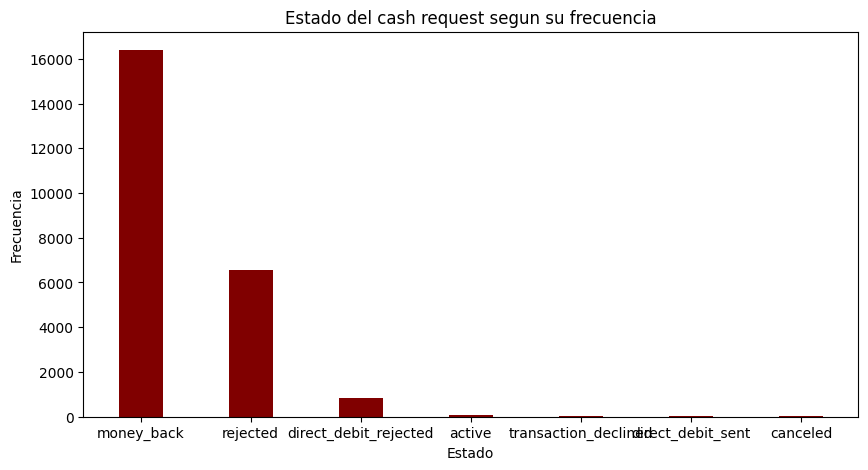

In [10]:
# Estado del cash segun cuantas veces se haya pedido
status_count = df_cr['status'].value_counts().reset_index()

fig = plt.figure(figsize = (10, 5))
plt.bar(status_count['status'], status_count['count'], color ='maroon', width = 0.4)

plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.title("Estado del cash request segun su frecuencia")
plt.show()
#Cruzar variables - tablas de márgenes.

In [11]:
# Pasamos a date todas las columnas necesarias para calcular los días desde que se pide el cash hasta que se paga de vuelta
df_cr['created_at'] = pd.to_datetime(df_cr['created_at'], errors='coerce')
df_cr['reimbursement_date'] = pd.to_datetime(df_cr['reimbursement_date'], format='ISO8601', errors='coerce')
df_cr['days_for_payment'] = (df_cr['reimbursement_date'] - df_cr['created_at']).dt.days



In [12]:
 #Eliminamos lo que son menores de 0 días porque es imposible
df_cr = df_cr[df_cr['days_for_payment']>=0]
df_cr['days_for_payment'].describe()

count    23969.000000
mean        25.368393
std         16.207669
min          1.000000
25%         15.000000
50%         23.000000
75%         30.000000
max        332.000000
Name: days_for_payment, dtype: float64

In [13]:
# Ponemos el id de deleted_account_id en user_id en aquellos que son NaN
df_cr['user_id'] = df_cr['user_id'].fillna(df_cr['deleted_account_id']) 

In [14]:
# Eliminamos todas aquellas columnas que no nos aportan info
df_cr['mes_año'] = df_cr['created_at'].dt.to_period('M')
df_cr = df_cr.drop(['created_at', 'money_back_date', 'updated_at', 'moderated_at', 'deleted_account_id', 'reimbursement_date', 'cash_request_received_date', 'send_at', 'reco_creation', 'reco_last_update'], axis=1)

df_cr

C:\Users\Ale\AppData\Local\Temp\ipykernel_21112\1001930468.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cr['mes_año'] = df_cr['created_at'].dt.to_period('M')


,id,amount,status,user_id,transfer_type,recovery_status,Grupo,days_for_payment,mes_año
0,5,100.0,rejected,804.0,regular,NaN,Grupo 3,29,2019-12
1,70,100.0,rejected,231.0,regular,NaN,Grupo 3,30,2019-12
2,7,100.0,rejected,191.0,regular,NaN,Grupo 3,29,2019-12
3,10,99.0,rejected,761.0,regular,NaN,Grupo 3,29,2019-12
4,1594,100.0,rejected,7686.0,regular,NaN,Grupo 3,30,2020-05
...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,13681.0,instant,NaN,Grupo 3,116,2020-10
23966,25243,50.0,money_back,30367.0,instant,completed,Grupo 2,7,2020-10
23967,22357,100.0,money_back,82122.0,instant,NaN,Grupo 3,108,2020-10
23968,20256,100.0,money_back,64517.0,instant,NaN,Grupo 3,118,2020-10


<Axes: xlabel='status'>

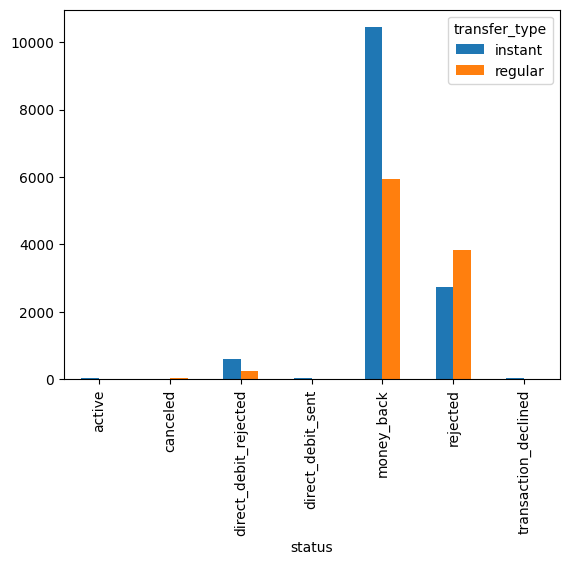

In [15]:
# Vemos si hay algún tipo de relación entre el status y el tipo de transferencia
df_cr.pivot_table(index='status' , columns='transfer_type', values='id', aggfunc='count').plot(kind='bar')

In [16]:
frec_uso = df_cr.groupby(['user_id', 'mes_año']).size().reset_index(name='frequency').sort_values(by='frequency', ascending=False)
frec_uso.dtypes

user_id        float64
mes_año      period[M]
frequency        int64
dtype: object

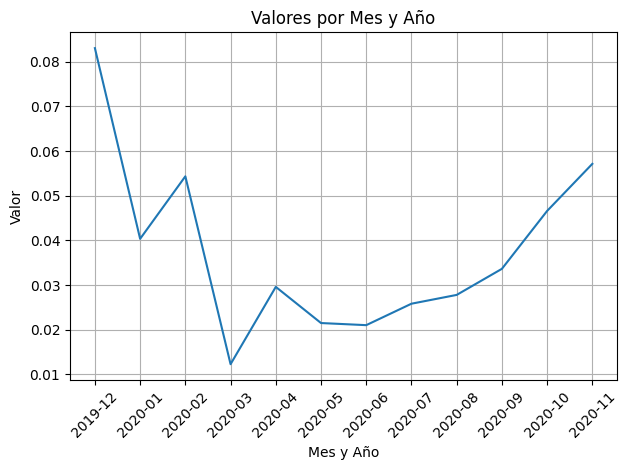

In [17]:
# Calculamos la tasa de incidentes y lo representamos en el tiempo con el objetivo de ver si evoluciona a mayor o menos
incidentes = df_cr[df_cr['status'] == 'direct_debit_rejected']
incident_rate = incidentes.groupby('mes_año').size() / df_cr.groupby('mes_año').size()
incident_rate.index = incident_rate.index.to_timestamp()
incident_rate.index = incident_rate.index.strftime('%Y-%m')

fig = plt.plot(incident_rate.index,incident_rate.values)
plt.xlabel('Mes y Año')
plt.ylabel('Valor')
plt.title('Valores por Mes y Año')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


In [18]:
# Calculamos la fecha de la primera vez que se hizo un request por usuario
user_first_request = df_cr.groupby('user_id')['mes_año'].min().reset_index()
user_first_request

,user_id,mes_año
0,34.0,2020-04
1,35.0,2019-12
2,47.0,2019-11
3,52.0,2019-12
4,53.0,2019-12
...,...,...
11788,103425.0,2020-11
11789,103437.0,2020-11
11790,103496.0,2020-11
11791,103503.0,2020-11


In [19]:
## Fees
df_fee
df_fee.isnull().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [20]:
# Reason: nos quedamos con la primera palabra
df_fee['reason'] = df_fee['reason'] .str.split().str[0]
df_fee['paid_at'] = pd.to_datetime(df_fee['paid_at'], errors='coerce')
df_fee['to_date'] = pd.to_datetime(df_fee['to_date'], errors='coerce')
df_fee.dtypes

id                               int64
cash_request_id                float64
type                            object
status                          object
category                        object
total_amount                   float64
reason                          object
created_at         datetime64[ns, UTC]
updated_at         datetime64[ns, UTC]
paid_at            datetime64[ns, UTC]
from_date                       object
to_date            datetime64[ns, UTC]
charge_moment                   object
dtype: object

In [21]:
# Nueva columna: días desded que se pide el cash request y se recibe el cobro de la fee por ello

def calcular_dias_fees(row):
    if pd.notna(row['paid_at']):
        return (row['paid_at'] - row['created_at']).days
    elif pd.notna(row['to_date']):
        return (row['to_date'] - row['created_at']).days
    else:
        return np.nan

df_fee['dias_para_cobrar'] = df_fee.apply(calcular_dias_fees, axis=1)

df_fee[['created_at', 'paid_at', 'to_date', 'dias_para_cobrar']]

,created_at,paid_at,to_date,dias_para_cobrar
0,2020-09-07 10:47:27.423150+00:00,2020-12-17 14:50:07.470110+00:00,NaT,101.0
1,2020-09-09 20:51:17.998653+00:00,2020-12-08 17:13:10.459080+00:00,NaT,89.0
2,2020-10-23 10:10:58.352972+00:00,2020-11-04 19:34:37.432910+00:00,NaT,12.0
3,2020-10-31 15:46:53.643958+00:00,2020-11-19 05:09:22.500223+00:00,NaT,18.0
4,2020-10-06 08:20:17.170432+00:00,2020-11-02 14:45:20.355598+00:00,NaT,27.0
...,...,...,...,...
21056,2020-10-10 06:42:22.822743+00:00,2020-11-17 05:14:00.080854+00:00,NaT,37.0
21057,2020-10-31 15:24:18.680694+00:00,2020-12-16 07:10:54.697639+00:00,NaT,45.0
21058,2020-10-27 17:28:51.749177+00:00,2020-11-18 04:35:42.915511+00:00,NaT,21.0
21059,2020-10-23 16:27:52.047457+00:00,2020-12-18 05:18:01.465317+00:00,NaT,55.0


In [22]:
# Eliminamos columnas que no aportan info
df_fee = df_fee.drop(['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date'], axis=1)


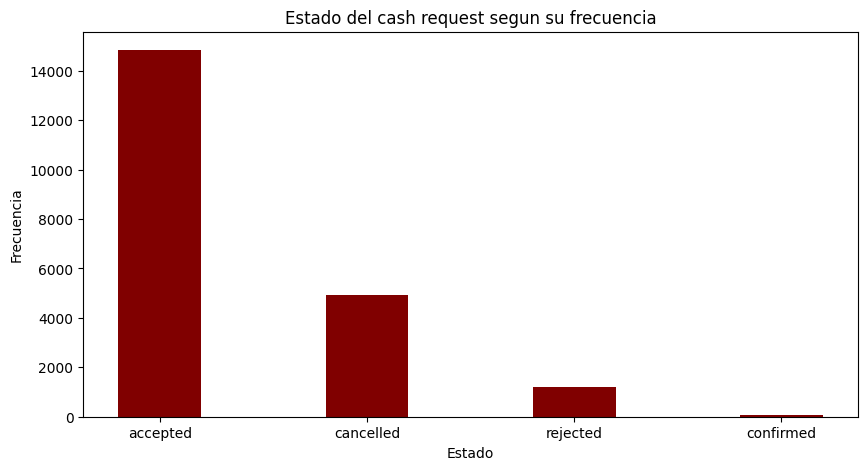

In [23]:
# Estado del cash request segun su frecuencia
status_count_fee = df_fee['status'].value_counts().reset_index()

fig = plt.figure(figsize = (10, 5))
plt.bar(status_count_fee['status'], status_count_fee['count'], color ='maroon', width = 0.4)

plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.title("Estado del cash request segun su frecuencia")
plt.show()
# Cuales son las rechazas/canceladas y por qué?

In [24]:
df_fee.describe().T
df_fee = df_fee[df_fee['dias_para_cobrar']>=0]
len(df_fee)

19579

In [25]:
merged_df = pd.merge(df_cr, df_fee, left_on='id', right_on='cash_request_id', how='left', suffixes=('_cr', '_fee'))

merged_df
# eda = 1 > 2 > 3 > 2 > 4
# # COmo varían las medias y medianas?

,id_cr,amount,status_cr,user_id,transfer_type,recovery_status,Grupo,days_for_payment,mes_año,id_fee,cash_request_id,type,status_fee,category,total_amount,reason,charge_moment,dias_para_cobrar
0,5,100.0,rejected,804.0,regular,NaN,Grupo 3,29,2019-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,100.0,rejected,231.0,regular,NaN,Grupo 3,30,2019-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,100.0,rejected,191.0,regular,NaN,Grupo 3,29,2019-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,99.0,rejected,761.0,regular,NaN,Grupo 3,29,2019-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,7686.0,regular,NaN,Grupo 3,30,2020-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30932,22357,100.0,money_back,82122.0,instant,NaN,Grupo 3,108,2020-10,15041.0,22357.0,instant_payment,accepted,NaN,5.0,Instant,after,108.0
30933,20256,100.0,money_back,64517.0,instant,NaN,Grupo 3,118,2020-10,20325.0,20256.0,postpone,accepted,NaN,5.0,Postpone,before,0.0
30934,20256,100.0,money_back,64517.0,instant,NaN,Grupo 3,118,2020-10,12366.0,20256.0,instant_payment,accepted,NaN,5.0,Instant,after,118.0
30935,19886,100.0,direct_debit_sent,44867.0,instant,NaN,Grupo 3,119,2020-10,12513.0,19886.0,postpone,accepted,NaN,5.0,Postpone,before,0.0


In [27]:
merged_df.isna().sum()

id_cr                   0
amount                  0
status_cr               0
user_id                 0
transfer_type           0
recovery_status     24485
Grupo                   0
days_for_payment        0
mes_año                 0
id_fee              11359
cash_request_id     11359
type                11359
status_fee          11359
category            29219
total_amount        11359
reason              11359
charge_moment       11359
dias_para_cobrar    11359
dtype: int64

In [31]:
# Métricas
frequency_de_uso = merged_df.groupby(['mes_año']).size().reset_index(name='usage_frequency')
frequency_de_uso

,mes_año,usage_frequency
0,2019-11,1
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244
5,2020-04,473
6,2020-05,912
7,2020-06,3295
8,2020-07,4408
9,2020-08,5049


In [34]:
# Ratio de incidentes
incident_rate = merged_df[merged_df['recovery_status'].notna()].groupby(['mes_año']).size().reset_index(name='incident_count')
total_transactions = merged_df.groupby(['mes_año']).size().reset_index(name='total_transactions')
incident_rate = pd.merge(incident_rate, total_transactions, on=['mes_año'])
incident_rate['incident_rate %'] = round(incident_rate['incident_count'] / incident_rate['total_transactions']*100, 2)
incident_rate

,mes_año,incident_count,total_transactions,incident_rate %
0,2019-12,39,289,13.49
1,2020-01,33,223,14.80
2,2020-02,16,184,8.70
3,2020-03,18,244,7.38
4,2020-04,59,473,12.47
5,2020-05,165,912,18.09
6,2020-06,764,3295,23.19
7,2020-07,871,4408,19.76
8,2020-08,1258,5049,24.92
9,2020-09,1428,6138,23.26


In [36]:
# Revenue Generated per Cohort
# Assuming 'total_amount' represents revenue
merged_df['Ingresos'] = merged_df['total_amount'].fillna(0) + merged_df['amount']

ingresos_cohort = merged_df.groupby(['mes_año'])['Ingresos'].sum().reset_index(name='Ingresos totales')

ingresos_cohort


,mes_año,Ingresos totales
0,2019-11,1.0
1,2019-12,27297.0
2,2020-01,21587.0
3,2020-02,16653.0
4,2020-03,23549.0
5,2020-04,46093.0
6,2020-05,86961.0
7,2020-06,316151.0
8,2020-07,409602.0
9,2020-08,446020.0


In [37]:
# Average Amount Per Transaction
average_amount_per_transaction = merged_df.groupby(['mes_año'])['Ingresos'].mean().reset_index(name='average_amount')
average_amount_per_transaction

,mes_año,average_amount
0,2019-11,1.000000
1,2019-12,94.453287
2,2020-01,96.802691
3,2020-02,90.505435
4,2020-03,96.512295
5,2020-04,97.448203
6,2020-05,95.351974
7,2020-06,95.948710
8,2020-07,92.922414
9,2020-08,88.338285
